### 신용카드 사용 기록

#### 필요한 패키지를 불러온다

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### 데이터를 불러와서 살펴 본다

In [2]:
os.chdir(r"C:\Users\Gram\Desktop\아시아경제 수업자료\01 Python 분석 기초 - 실습\data")
df = pd.read_csv('data_credit.csv', header='infer',encoding='latin1')

In [3]:
df.shape

(3362796, 8)

In [4]:
df.head(5)    #할부가 빈칸(일시불), 홀리데이가 1이면 공휴일

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


#### 데이터를 클리닝하고 결측치 처리를 한다

In [5]:
# 결측치가 분명히 있는 것 같으니 컬럼별 집계해 본다.
nas = df.isnull()        #df.isnull()은 na인 위치에 True인 작성한 데이터프레임
nas                      #어디에 결측치가 났는지 인지를 먼저 시킴
                         #df.isnull(axis=0)하면 에러남, 자동으로 열계산인듯?

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,False,False,False,False,False,True,False,False
1,False,False,False,False,False,True,False,False
2,False,False,False,False,False,True,False,False
3,False,False,False,False,False,True,False,False
4,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...
3362791,False,False,False,False,False,True,False,False
3362792,False,False,False,False,False,True,False,False
3362793,False,False,False,False,False,True,False,False
3362794,False,False,False,False,False,True,False,False


In [6]:
(df.isnull()).sum(axis=0)   #True는 1로 계산해 sum =>na개수를 칼럼별로 더한다
                            #installment에 결측치보임     
#print(nas.sum(axis=0)) (원래 답)

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64

In [7]:
# installments 변수의 도수분포를 본다.
df['installments'].value_counts()   #도수분포표는 결측치를 생략하고 보여줌?

3.0     10686
2.0      3431
5.0      1220
6.0       647
10.0      252
4.0       209
12.0      206
24.0       96
8.0        32
7.0        28
9.0        25
18.0       11
20.0        6
36.0        5
22.0        4
15.0        2
Name: installments, dtype: int64

In [8]:
df = df.fillna(value=1)   # 일시불이 NA로 처리 되었으니 결측치를 1로 채운다.
df.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0


In [9]:
# 다시 installments 변수의 도수분포를 본다.
df['installments'].value_counts()      #다시 도수분포표 보는 의미가 있음?

1.0     3345936
3.0       10686
2.0        3431
5.0        1220
6.0         647
10.0        252
4.0         209
12.0        206
24.0         96
8.0          32
7.0          28
9.0          25
18.0         11
20.0          6
36.0          5
22.0          4
15.0          2
Name: installments, dtype: int64

In [10]:
# 일단 date와 time은 사용하지 않겠으니 제거한다
df = df.drop(columns=['date','time'])
df.head(5)

,store_id,card_id,amount,installments,days_of_week,holyday
0,0,d297bba73f,5,1.0,2,0
1,0,d297bba73f,-5,1.0,2,0
2,0,0880849c05,144,1.0,0,0
3,0,8b4f9e0e95,66,1.0,0,0
4,0,7ad237eed0,24,1.0,0,0


#### 개개 변수를 다양한 방법으로 요약하고 시각화 한다

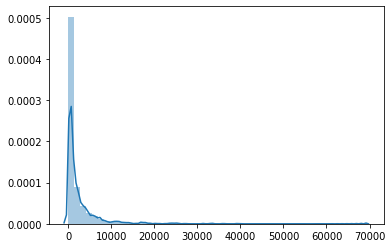

In [12]:
freq1 = df['store_id'].value_counts()     #가맹점 도수분포표
sns.distplot(freq1.values,bins=50)        #가맹점 히스토그램
plt.show()        #결과를 보니 그래프가 한쪽으로 치우쳐 로그변환 필요

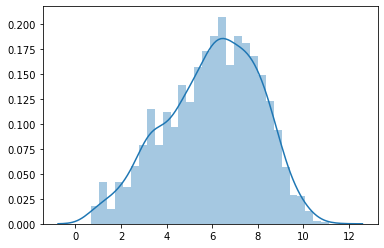

In [13]:
# 큰 skew를 보이므로 log 변환해 본다.
freq1b = np.log(freq1+1)   #freq1데이터를 로그변환
sns.distplot(freq1b.values,bins=30)   #다시 히스토그램 그려봄
plt.show()

In [14]:
print(np.median(freq1))

492.0


In [15]:
# Top store id를 본다.
freq1.sort_values(ascending=False)[:10]   #값을 기준 내림차순 소팅

0       68773
753     39318
105     36063
1342    33335
428     33285
221     31409
161     27170
1038    25694
323     25221
1366    24946
Name: store_id, dtype: int64

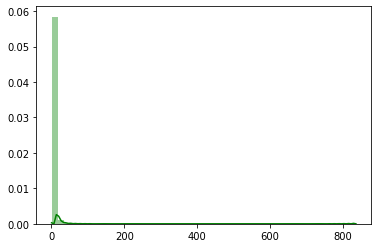

In [16]:
# card_id의 도수의 히스토그램.
freq2 = df['card_id'].value_counts()
sns.distplot(freq2.values,bins=50,color="green")
plt.show()

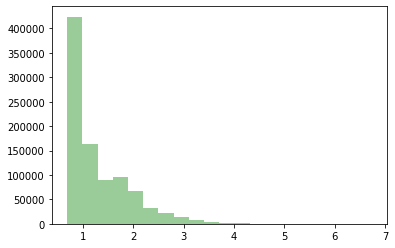

In [17]:
# 큰 skew를 보이므로 log 변환해 본다.
freq2b = np.log(freq2+1)
sns.distplot(freq2b.values,bins=20,color="green",kde=False)
plt.show()

In [18]:
# Top 10 card id를 본다.
freq2.sort_values(ascending=False)[:10]

53817035d4    835
93bba5079c    512
994b71a98a    458
18549044f3    453
6b2d18c5c5    433
10a5c30cda    425
06e61d93b8    423
5cf0b23473    413
0177959e09    409
a9a1e3d97d    405
Name: card_id, dtype: int64

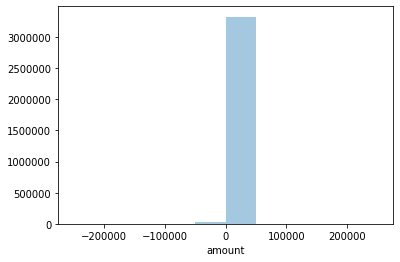

In [19]:
# amount의 히스토그램.
sns.distplot(df.amount,bins=10,kde=False)
plt.show()

In [20]:
# 실제 구매 or Cancel
ser = df.amount > 0
np.round(ser.mean(),4)  # 실제 구매의 퍼센티지

0.9896

In [21]:
# installments의 막대그림
freq3 = df['installments'].value_counts()
print("installments의 가짓수 = {}".format((freq3.index).nunique()))

installments의 가짓수 = 17


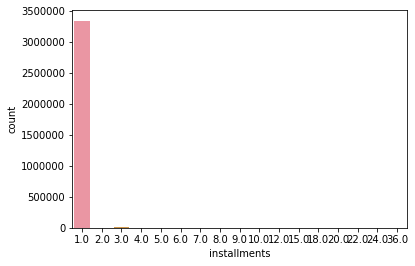

In [22]:
# Seaborn의 countplot(막대그림)이 집계하여 보여준다.  
sns.countplot(data=df, x='installments')
plt.show()

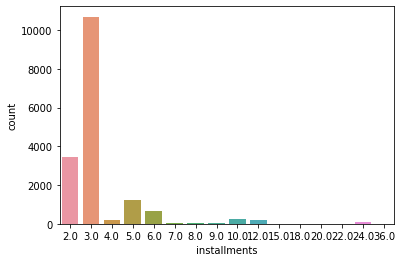

In [23]:
# 1이 너무나 많으니 제거하고 다시 시각화 해본다.
sns.countplot(data=df[df.installments != 1], x='installments')
plt.show()

In [24]:
# days_of_week의 횟수 막대그림
freq4 = df['days_of_week'].value_counts()
print("days of week의 가짓수 = {}".format((freq4.index).nunique()))

days of week의 가짓수 = 7


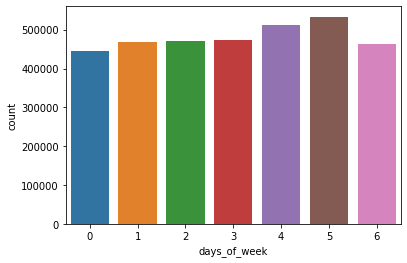

In [25]:
# Seaborn의 countplot이 집계하여 보여준다.
sns.countplot(data=df, x='days_of_week')
plt.show()

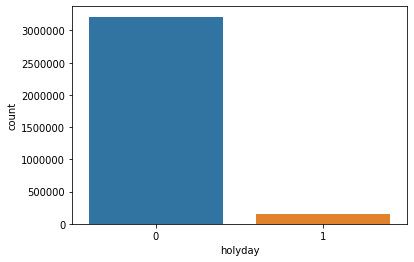

In [26]:
# holiday의 막대그림
sns.countplot(data=df, x='holyday')
plt.show()

#### 일변량 요약과 시각화

In [27]:
# 휴일 여부별 평균 사용 금액.
df.groupby('holyday')['amount'].mean()   #휴일 여유별 금액평균

holyday
0    146.476094
1    134.881488
Name: amount, dtype: float64

In [28]:
# 요일별 평균 결제 금액.
ser1 = df.groupby('days_of_week')['amount'].mean()
ser1

days_of_week
0    143.199131
1    148.230134
2    149.429079
3    150.447155
4    150.952690
5    146.961930
6    131.532084
Name: amount, dtype: float64

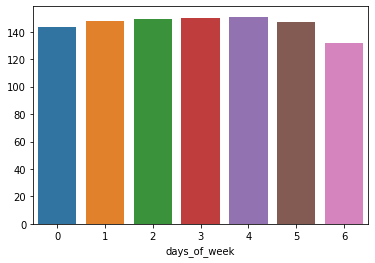

In [29]:
sns.barplot(ser1.index, ser1.values)
plt.show()

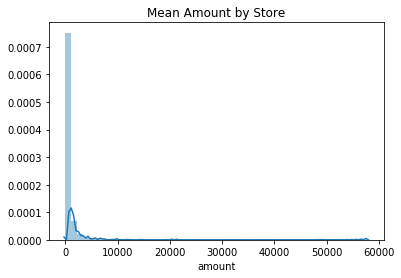

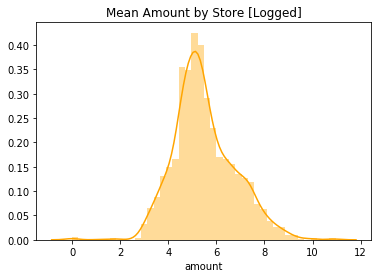

In [30]:
# store_id 별 평균 결제 금액.
ser2 = df.groupby('store_id')['amount'].mean()
sns.distplot(ser2).set_title('Mean Amount by Store')
plt.show()
sns.distplot(np.log(ser2+1),color='orange').set_title('Mean Amount by Store [Logged]')
plt.show()

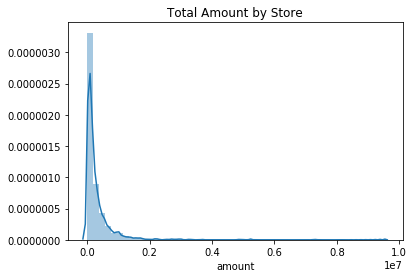

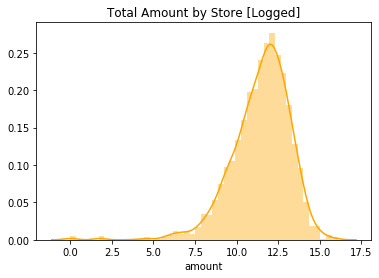

In [31]:
# store_id 별 Total 결제 금액.
ser2b = df.groupby('store_id')['amount'].sum()
sns.distplot(ser2b).set_title('Total Amount by Store')
plt.show()
sns.distplot(np.log(ser2b+1),color='orange').set_title('Total Amount by Store [Logged]')
plt.show()

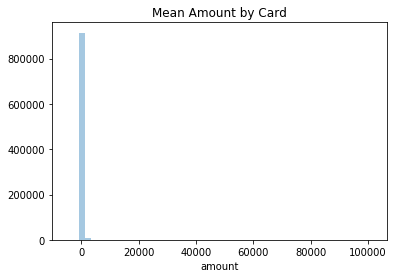

In [32]:
# card_id 별 평균 결제 금액.
ser3 = df.groupby('card_id')['amount'].mean()
sns.distplot(ser3, kde=False).set_title('Mean Amount by Card')
plt.show()

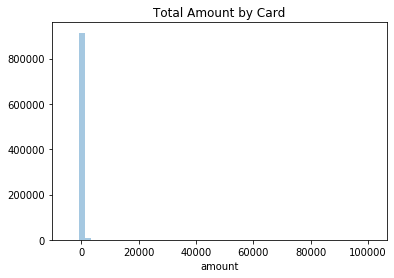

In [33]:
# card_id 별 Total 결제 금액.
ser3b = df.groupby('card_id')['amount'].mean()
sns.distplot(ser3b, kde=False).set_title('Total Amount by Card')
plt.show()

#### 분류

In [34]:
# store_id 별 Total 결제 금액에 의한 3 등급 분류
ser2c = pd.qcut(ser2b,3,labels=['Low', 'Medium', 'High'])
combo2 = pd.DataFrame({"amount":ser2b.values, "category":ser2c.values})
combo2.head(5)

,amount,category
0,5234611,High
1,147950,Medium
2,1615060,High
3,62781,Medium
4,270312,High


In [35]:
# 등급별 평균.
combo2.groupby("category")["amount"].mean()

category
Low        23272.582770
Medium    125787.788494
High      680276.184122
Name: amount, dtype: float64

In [36]:
# card_id 별 Total 결제 금액에 의한 3 등급 분류
ser3c = pd.qcut(ser3b,3,labels=['Low', 'Medium', 'High'])
combo3 = pd.DataFrame({"amount":ser3b.values, "category":ser3c.values})
combo3.head(5)

,amount,category
0,10.000000,Low
1,55.166667,Low
2,90.000000,Medium
3,80.000000,Medium
4,14.400000,Low


In [37]:
# 등급별 평균.
combo3.groupby("category")["amount"].mean()

category
Low        41.028604
Medium    103.314023
High      364.835640
Name: amount, dtype: float64

#### 이변량 요약과 시각화

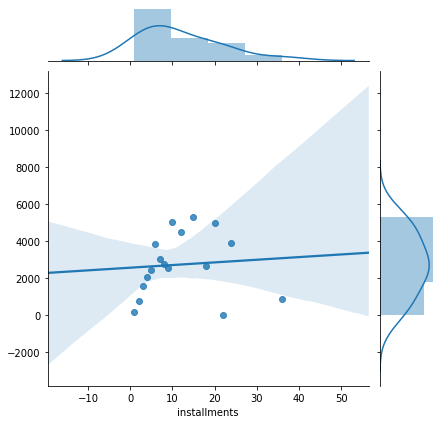

In [38]:
# installment 대 amount
ser = df.groupby('installments')['amount'].mean()
sns.jointplot(ser.index, ser.values, kind='reg')  # installments 로그변환.
plt.show()

In [39]:
# 거래 횟수 대 총 거래 금액
sera = np.log(df['store_id'].value_counts()+1)             # 로그변환.
serb = np.log(df.groupby('store_id')['amount'].sum()+1)    # 로그변환.

In [40]:
df2 = pd.concat([sera,serb],axis=1)
df2.columns = ['Frequency', 'Amount']      # 컬럼 명칭을 바로 쓴다.

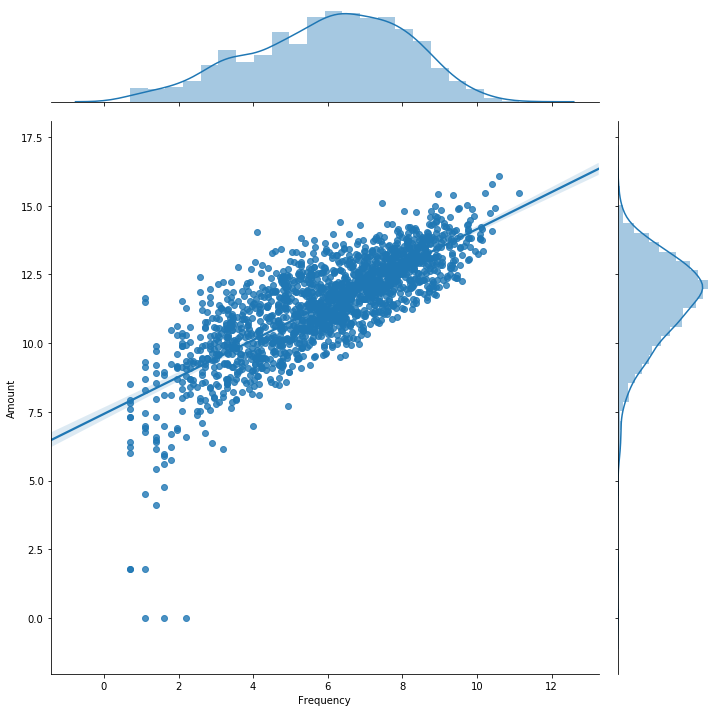

In [41]:
sns.jointplot(x='Frequency',y='Amount',data=df2,kind="reg", size=10)
plt.show()